<a href="https://colab.research.google.com/github/laraagasii/DIF62130_B_24-25_2311531002_HanifahLaramaAgasi/blob/main/Praktikum1/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

1. pandas, numpy → Manipulasi dan analisis data.
2. matplotlib.pyplot → Visualisasi data.
3. MinMaxScaler → Normalisasi fitur agar dalam rentang tertentu.
4. PolynomialFeatures → Membuat fitur polinomial untuk regresi non-linear.
5. train_test_split → Membagi data menjadi training & testing.
6. LinearRegression → Model regresi linier untuk prediksi.
7. mean_squared_error → Mengukur kesalahan prediksi (MSE).
8. fetch_california_housing → Dataset harga rumah di California untuk analisis regresi.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = pd.Series(housing.target)

targets = df['MedHouseValue']                       #Dependent Variable
inputs = df.drop(['MedHouseValue'], axis=1)         #Independent Variable
df.head()                                           #Menampilkan 5 data teratas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1. fetch_california_housing() → Mengambil dataset harga rumah di California.
2. pd.DataFrame(housing.data, columns=housing.feature_names) → Mengubah data menjadi DataFrame dengan nama fitur.
3. df['MedHouseValue'] = pd.Series(housing.target) → Menambahkan kolom harga median rumah sebagai target (variabel dependen).
4. targets = df['MedHouseValue'] → Menyimpan variabel target (harga rumah).
5. inputs = df.drop(['MedHouseValue'], axis=1) → Menyimpan variabel independen (fitur rumah).
6. df.head() → Menampilkan 5 data teratas untuk melihat struktur dataset.

In [ ]:
# df.describe()
# df.info()
print('DataFrame dimension: ', df.shape)

DataFrame dimension:  (20640, 9)


1. df.shape → Mengembalikan jumlah baris dan kolom dalam dataset.
2. Dicetak dalam format teks untuk memberikan informasi yang jelas.
3. Komentar df.describe() & df.info() menunjukkan bahwa analisis statistik dan informasi dataset bisa dilakukan tetapi tidak dijalankan di sini.

Bagi dataset menjadi data training (70%) dan data testing (30%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(14448, 8) (6192, 8)
(14448,) (6192,)


1. train_test_split(inputs, targets, test_size=0.3, random_state=1)


*   70% data digunakan untuk training (X_train, y_train).
*   30% data digunakan untuk testing (X_test, y_test).
*   random_state=1 memastikan pembagian data tetap sama setiap kali dijalankan.

2. print(X_train.shape, X_test.shape) → Menampilkan jumlah baris dan kolom pada data training & testing untuk fitur.
3. print(y_train.shape, y_test.shape) → Menampilkan jumlah baris pada target training & testing.

Lakukan data prepocesing pada data training dan testing dengan mentransformasi semua fitur agar nilainya berada pada selang[0,1]

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_test)

[[1.89659453e-01 7.45098039e-01 2.59249620e-02 ... 8.26699958e-04
  1.61530287e-01 5.94594595e-01]
 [1.01964111e-01 7.05882353e-01 2.93658328e-02 ... 1.49655077e-03
  4.50584485e-01 4.52452452e-01]
 [2.42293210e-01 8.82352941e-01 2.57625553e-02 ... 2.43712035e-03
  5.51540914e-01 1.88188188e-01]
 ...
 [1.43901463e-01 9.01960784e-01 2.71911561e-02 ... 1.63065424e-03
  5.92986185e-01 2.05205205e-01]
 [1.45508338e-01 2.35294118e-01 2.97484189e-02 ... 1.59782455e-03
  5.87672689e-01 2.06206206e-01]
 [8.33367816e-02 5.49019608e-01 1.45501245e-02 ... 1.74904890e-03
  1.65781084e-01 6.00600601e-01]]


1. MinMaxScaler() → Membuat objek scaler untuk normalisasi.
2. scaler.fit_transform(X_train) → Menyesuaikan scaler dengan data training dan mentransformasikan nilainya ke skala 0-1.
3. scaler.transform(X_test) → Menggunakan scaler yang sama untuk menormalisasi data testing (tanpa fitting ulang).
4. print(X_test) → Menampilkan hasil transformasi data testing.

Latih model regresi linier menggunakan semua fitur di data training yang sudah diskalakan. Kemudian tampilkan nilai intercept dan slope variabelnya

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

1. LinearRegression() → Membuat model regresi linier.
2. lr_model.fit(X_train, y_train) → Melatih model menggunakan data training (X_train) untuk mempelajari hubungan antara fitur rumah dan harga rumah (y_train).

In [ ]:
print(f'intercept: {lr_model.intercept_}')
print(f'slope: {lr_model.coef_}')

intercept: 3.7215161325064994
slope: [  6.39513914   0.49408893 -14.78075919  20.98391128  -0.2003207
  -4.08551937  -3.98214561  -4.37460957]


1. lr_model.intercept_ → Nilai intercept (b) dalam persamaan regresi (nilai harga rumah saat semua fitur bernilai nol).
2. lr_model.coef_ → Array yang berisi koefisien regresi (m) untuk setiap fitur (kemiringan garis regresi).

Evaluasi model yang telah dilatih menggunakan data testing dengan menghitung MSE dan R2 serta plot hubungan antara target output dan hasil prediksinya

In [ ]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
r2 = lr_model.score(X_test, y_test)
print(f'R2: {r2}')

MSE: 0.5296293151408232
R2: 0.597142973735963


1. lr_model.predict(X_test) → Menggunakan model untuk memprediksi harga rumah berdasarkan data uji (X_test).
2. mean_squared_error(y_test, y_pred) → Menghitung Mean Squared Error (MSE), yaitu rata-rata kuadrat selisih antara nilai aktual (y_test) dan prediksi (y_pred).
3. lr_model.score(X_test, y_test) → Menghitung R² Score, yaitu seberapa baik model menjelaskan variasi dalam data (mendekati 1 berarti lebih akurat).
4. print(f'MSE: {mse}') & print(f'R2: {r2}') → Menampilkan hasil evaluasi.

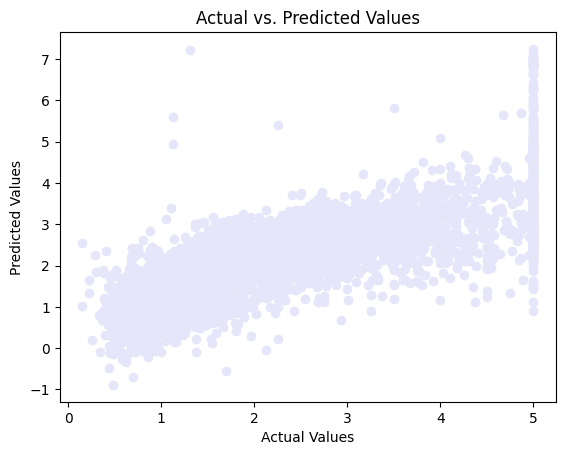

In [ ]:
plt.scatter(y_test, y_pred, color= 'lavender')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

1. plt.scatter(y_test, y_pred, color='lavender') → Membuat plot titik-titik dengan sumbu X = nilai aktual dan Y = nilai prediksi.
2. plt.xlabel('Actual Values') & plt.ylabel('Predicted Values') → Memberi label pada sumbu X dan Y.
3. plt.title('Actual vs. Predicted Values') → Memberi judul grafik.
4. plt.show() → Menampilkan plot.